<a href="https://colab.research.google.com/github/ajinkyaraskar95/Titanic/blob/main/Titanic_fin_feature_sel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Dataset

In this notebook, we're going to analyse the famous Titanic dataset from Kaggle.


we will be doing **Explarotary Data Analysis, Feature Engineering, Model Creation and Hyperparameter Tuning**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

1.**Preprocessing**

First part of data analysis to load data and pre-process to fit to machine learning.

**1.1 Loading CSV data**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Projects/Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Projects/Titanic/test.csv')

In [ ]:
# we will take a look at first few rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Information about the dataset. 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**1.2 Explarotary Data Analysis**

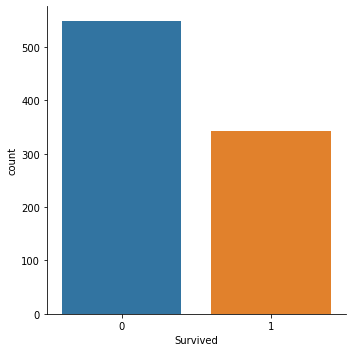

In [ ]:
sns.catplot(x='Survived',data=df_train,kind='count')

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

No major imbalance in dependent feature.

To know the particulars about survivors we have to explore more of the data.

The survival rate can be determined by different features of the dataset such as Sex, Port of Embarcation, Age few to be mentioned
Checking survival rate using feature Sex

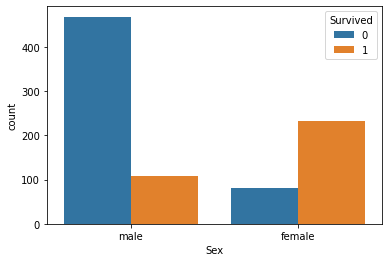

In [ ]:
sns.countplot(x = 'Sex',data = df_train,hue='Survived')
plt.show()

There were more male passengers onboard and chances of survival for females was more.

Let's take a look at how the passengers were divided among different classes.

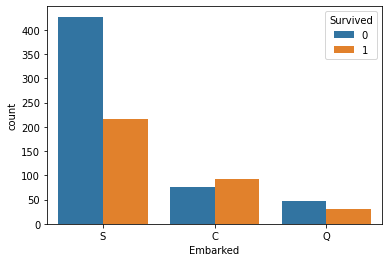

In [ ]:
sns.countplot(x='Embarked',data = df_train, hue='Survived')

Chances of survival for class S was lower than other classes.

Age column can be divided between age groups 

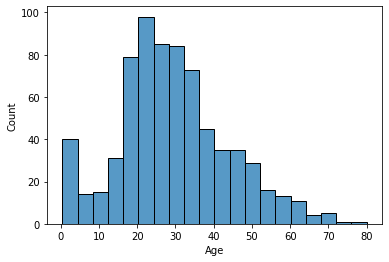

In [ ]:
sns.histplot(df_train['Age'])

Age column can be divided in age groups.

In [ ]:
def agegroup(x):
  if x<18:
    return 18 
  elif x<30:
    return 30
  elif x<40:
    return 40
  elif x<50:
    return 50
  elif x<60:
    return 60
  else:
    return 70

In [ ]:
df_train['Age'].median()

28.0

In [ ]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_test['Age'].fillna(df_train['Age'].median(),inplace=True)

In [ ]:
df_train['Age_group'] = df_train['Age'].apply(agegroup)
df_test['Age_group'] = df_test['Age'].apply(agegroup)

In [ ]:
df_train['Age_group'].value_counts()

30    448
40    167
18    113
50     89
60     48
70     26
Name: Age_group, dtype: int64

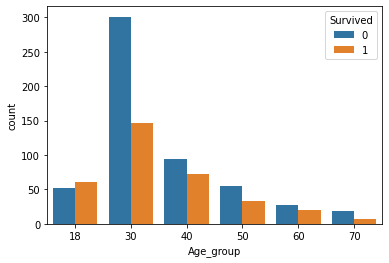

In [ ]:
sns.countplot(x='Age_group',data = df_train, hue='Survived')

Chances of survival of children are more and for people in 30's

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_group    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


# Imputation

In [ ]:
df_train.isna().sum()[df_train.isna().sum()!=0]

Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_test.isna().sum()[df_test.isna().sum()!=0]

Fare       1
Cabin    327
dtype: int64

In [ ]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

df_test['Fare'].fillna(df_train['Fare'].median(),inplace=True)

# **feature selection**

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,40


In [ ]:
sr1 = df_train['Name'].apply(lambda x: x.split(',')[1].split()[0])
sr2 = df_test['Name'].apply(lambda x: x.split(',')[1].split()[0])

In [ ]:
df_train.drop('PassengerId',axis=1,inplace=True)

In [ ]:
df_test.drop(['Name','Ticket'],inplace=True,axis=1)

In [ ]:
df_train.drop(['Name','Ticket'],inplace=True,axis=1)

In [ ]:
sr1.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

we will just consider major titles remaining will be labeled as other

In [ ]:
titles = ['Mr.','Miss.','Mrs.','Master.']

df_train['title'] = sr1.apply(lambda x: x if x in titles else 'other' )
df_test['title'] = sr2.apply(lambda x: x if x in titles else 'other' )

In [ ]:
df_train['title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
other       27
Name: title, dtype: int64

In [ ]:
df_train['Sex'] = np.where(df_train['Sex']=='male',1,0)

In [ ]:
df_test['Sex'] = np.where(df_test['Sex']=='male',1,0)

In [ ]:
df_train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
#some people have multiple cabins
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split()))
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split()))

In [ ]:
df_train.select_dtypes(include='object')

,Embarked,title
0,S,Mr.
1,C,Mrs.
2,S,Miss.
3,S,Mrs.
4,S,Mr.
...,...,...
886,S,other
887,S,Miss.
888,S,Miss.
889,C,Mr.


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group,title
0,0,3,1,22.0,1,0,7.2500,0,S,30,Mr.
1,1,1,0,38.0,1,0,71.2833,1,C,40,Mrs.
2,1,3,0,26.0,0,0,7.9250,0,S,30,Miss.
3,1,1,0,35.0,1,0,53.1000,1,S,40,Mrs.
4,0,3,1,35.0,0,0,8.0500,0,S,40,Mr.


In [ ]:
#['Survived','Pclass','Sex','Ticket','Cabin','Embarked']

In [ ]:
cat_cols = ['Sex','Embarked','Pclass','Age_group','title','Cabin']
df_cat_train = df_train[cat_cols]
df_cat_test = df_test[cat_cols]
dummy_cols = ['Embarked','Pclass','Age_group','title']

for col in dummy_cols:
  df_dum = pd.get_dummies(df_train[col],prefix=col)
  df_dum_test = pd.get_dummies(df_test[col],prefix=col)

  df_cat_train = pd.concat([df_cat_train, df_dum], axis=1)
  df_cat_test = pd.concat([df_cat_test, df_dum_test], axis=1)

  df_cat_train.drop(col,axis=1,inplace=True)
  df_cat_test.drop(col,axis=1,inplace=True)

In [ ]:
df_cat_train.head()

,Sex,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_group_18,Age_group_30,Age_group_40,Age_group_50,Age_group_60,Age_group_70,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_other
0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sex            891 non-null    int64
 1   Cabin          891 non-null    int64
 2   Embarked_C     891 non-null    uint8
 3   Embarked_Q     891 non-null    uint8
 4   Embarked_S     891 non-null    uint8
 5   Pclass_1       891 non-null    uint8
 6   Pclass_2       891 non-null    uint8
 7   Pclass_3       891 non-null    uint8
 8   Age_group_18   891 non-null    uint8
 9   Age_group_30   891 non-null    uint8
 10  Age_group_40   891 non-null    uint8
 11  Age_group_50   891 non-null    uint8
 12  Age_group_60   891 non-null    uint8
 13  Age_group_70   891 non-null    uint8
 14  title_Master.  891 non-null    uint8
 15  title_Miss.    891 non-null    uint8
 16  title_Mr.      891 non-null    uint8
 17  title_Mrs.     891 non-null    uint8
 18  title_other    891 non-null    uint8
dtypes: int64

In [ ]:
df_cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sex            418 non-null    int64
 1   Cabin          418 non-null    int64
 2   Embarked_C     418 non-null    uint8
 3   Embarked_Q     418 non-null    uint8
 4   Embarked_S     418 non-null    uint8
 5   Pclass_1       418 non-null    uint8
 6   Pclass_2       418 non-null    uint8
 7   Pclass_3       418 non-null    uint8
 8   Age_group_18   418 non-null    uint8
 9   Age_group_30   418 non-null    uint8
 10  Age_group_40   418 non-null    uint8
 11  Age_group_50   418 non-null    uint8
 12  Age_group_60   418 non-null    uint8
 13  Age_group_70   418 non-null    uint8
 14  title_Master.  418 non-null    uint8
 15  title_Miss.    418 non-null    uint8
 16  title_Mr.      418 non-null    uint8
 17  title_Mrs.     418 non-null    uint8
 18  title_other    418 non-null    uint8
dtypes: int64

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
f_p_values=chi2(df_cat_train,df_train['Survived'])

In [ ]:
p_val = f_p_values[1]

In [ ]:
cols = df_cat_train.columns

In [ ]:
selected = []
rejected = []
d1 = {}
for i in range(len(cols)):
  d1[cols[i]]=p_val[i]

  if p_val[i]>0.05:
    rejected.append(cols[i])

  else:
    selected.append(cols[i])

In [ ]:
print('Selected Columns',selected)

Selected Columns ['Sex', 'Cabin', 'Embarked_C', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_group_18', 'Age_group_30', 'title_Master.', 'title_Miss.', 'title_Mr.', 'title_Mrs.']


In [ ]:
# feature selection with Anova

from sklearn.feature_selection import f_classif

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group,title
0,0,3,1,22.0,1,0,7.2500,0,S,30,Mr.
1,1,1,0,38.0,1,0,71.2833,1,C,40,Mrs.
2,1,3,0,26.0,0,0,7.9250,0,S,30,Miss.
3,1,1,0,35.0,1,0,53.1000,1,S,40,Mrs.
4,0,3,1,35.0,0,0,8.0500,0,S,40,Mr.


In [ ]:
#Numeric cols
num_cols = ['Age','Fare']
f_p_values = f_classif(df_train[num_cols],df_train['Survived'])

In [ ]:
p_val = f_p_values[1]

In [ ]:
selected_num = []
rejected_num = []
d2 = {}
for i in range(len(num_cols)):
  d2[num_cols[i]]=p_val[i]

  if p_val[i]>0.05:
    rejected_num.append(num_cols[i])

  else:
    selected_num.append(num_cols[i])

In [ ]:
selected_num

['Fare']

In [ ]:
d2

{'Age': 0.05276068847582179, 'Fare': 6.120189341922221e-15}

In [ ]:
df_cat_train.head()

,Sex,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_group_18,Age_group_30,Age_group_40,Age_group_50,Age_group_60,Age_group_70,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_other
0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_x = df_cat_train[selected]

In [ ]:
df_x_test = df_cat_test[selected]

In [ ]:
df_x = pd.concat([df_x,df_train[selected_num]],axis=1)
df_x_test = pd.concat([df_x_test,df_test[selected_num]],axis=1)

In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            891 non-null    int64  
 1   Cabin          891 non-null    int64  
 2   Embarked_C     891 non-null    uint8  
 3   Embarked_S     891 non-null    uint8  
 4   Pclass_1       891 non-null    uint8  
 5   Pclass_2       891 non-null    uint8  
 6   Pclass_3       891 non-null    uint8  
 7   Age_group_18   891 non-null    uint8  
 8   Age_group_30   891 non-null    uint8  
 9   title_Master.  891 non-null    uint8  
 10  title_Miss.    891 non-null    uint8  
 11  title_Mr.      891 non-null    uint8  
 12  title_Mrs.     891 non-null    uint8  
 13  Fare           891 non-null    float64
dtypes: float64(1), int64(2), uint8(11)
memory usage: 30.6 KB


In [ ]:
df_x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            418 non-null    int64  
 1   Cabin          418 non-null    int64  
 2   Embarked_C     418 non-null    uint8  
 3   Embarked_S     418 non-null    uint8  
 4   Pclass_1       418 non-null    uint8  
 5   Pclass_2       418 non-null    uint8  
 6   Pclass_3       418 non-null    uint8  
 7   Age_group_18   418 non-null    uint8  
 8   Age_group_30   418 non-null    uint8  
 9   title_Master.  418 non-null    uint8  
 10  title_Miss.    418 non-null    uint8  
 11  title_Mr.      418 non-null    uint8  
 12  title_Mrs.     418 non-null    uint8  
 13  Fare           418 non-null    float64
dtypes: float64(1), int64(2), uint8(11)
memory usage: 14.4 KB


In [ ]:
x = df_x
y = df_train['Survived']

x_test = df_x_test

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_test_scalede = scaler.transform(x_test)

In [ ]:
X_scaled

array([[ 0.73769513, -0.48848295, -0.48204268, ...,  0.85053175,
        -0.4039621 , -0.50244517],
       [-1.35557354,  1.34024943,  2.0745051 , ..., -1.17573506,
         2.47547975,  0.78684529],
       [-1.35557354, -0.48848295, -0.48204268, ..., -1.17573506,
        -0.4039621 , -0.48885426],
       ...,
       [-1.35557354, -0.48848295, -0.48204268, ..., -1.17573506,
        -0.4039621 , -0.17626324],
       [ 0.73769513,  1.34024943,  2.0745051 , ...,  0.85053175,
        -0.4039621 , -0.04438104],
       [ 0.73769513, -0.48848295, -0.48204268, ...,  0.85053175,
        -0.4039621 , -0.49237783]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model_xg = XGBClassifier()
model_rf = RandomForestClassifier()
model_lr = LogisticRegression()

In [ ]:
models = [model_xg,model_rf,model_lr]

for model in models:
  model.fit(X_scaled,y)
  y_pre = model.predict(X_test_scalede)

  submit = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pre})
  s = str(model)+'.csv'
  submit.to_csv(s,index=False)

In [ ]:
models = [model_xg,model_rf]

for model in models:
  model.fit(x,y)
  y_pre = model.predict(x_test)

  submit = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pre})
  s = str(model)+'.csv'
  submit.to_csv(s,index=False)

In [ ]:
#HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params= {'n_estimators':[10,25,50,75,100,150],
         'max_depth':[2,3,4,5,6],
         'min_samples_split':[2,3,4,5,6],
         'min_samples_leaf':[2,3,4,5,6],
         'max_features':['auto','sqrt']}

grid_cv= GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1, cv=5)

In [ ]:
grid_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 25, 50, 75, 100, 150]})

In [ ]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=10)

In [ ]:
modelRF_GrCV = RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=10)

In [ ]:
modelRF_GrCV.fit(x,y)
y_pre = modelRF_GrCV.predict(x_test)

submit = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pre})

submit.to_csv('modelRF_GrCV.csv',index=False)

# hyperparameter tuning XGBoost

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}
    

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
random_search = RandomizedSearchCV(XGBClassifier(),param_distributions=params,n_iter=5,
                                  n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 2.75 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.2, max_depth=15, min_child_weight=5)

In [ ]:
model_XG_RV = XGBClassifier(colsample_bytree=0.7, gamma=0.2, max_depth=15)

model_XG_RV.fit(x,y)
y_pre = model_XG_RV.predict(x_test)

submit = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pre})

submit.to_csv('model_XG_RV1.csv',index=False)